In [1]:
from pandas import Series
import pandas as pd
from datetime import date
pd.__version__

'1.0.5'

In [2]:
import matplotlib as mat
mat.__version__

'3.2.2'

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
# Setando opção do Pandas para mostrar todas as linhas
pd.set_option('display.max_rows', None)

In [5]:
# Setando definição de cores
def color_negative_red(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

In [6]:
# Setando variáveis
ano = 2021
valor_acerto = 0
arquivo_csv = 'arquivos/relatorioOperacoes' + str(ano) + '.csv'
data_acerto = '31/12/' + str(ano)
matrix_acerto = [[2020, '01/07/2020', '-20,79', '0,00'],
                 [2020, '01/09/2020', '2,66', '0,00'],
                 [2021, '01/02/2021', '4,45', '5.434,28']]

In [7]:
# Usando o método read_csv
df = pd.read_csv(arquivo_csv, delimiter=";", encoding='ansi')

In [8]:
# Ajustando o CSV (header e coluna vazia)
df.columns.values[0] = df.columns.values[1]
df.columns.values[1] = "temp"
del df["temp"]

In [9]:
#Substitui NaN por "-"
df = df.fillna("-")

In [10]:
# Copia coluna "Lucro/Perda (R$)" para novo Dataframe dfTemp
dfTemp = df["Lucro/Perda (R$)"]

In [11]:
dfFinal = df

In [12]:
# Exclui coluna "Lucro/Perda (R$)" do Dataframe dfFinal
del dfFinal["Lucro/Perda (R$)"]

In [13]:
# Copia índices para exclusão do dfTemp
index = df[df['Ativo'] != '-'].index
# Exclui linhas nulas do dfTemp
dfTemp.drop(index, inplace=True)

In [14]:
# Reorganiza índice dfTemp
dfTemp.index = pd.Categorical(dfTemp.index).codes

In [15]:
# Copia índices para exclusão do dfFinal
index = df[df['Ativo'] == '-'].index
# Exclui linhas nulas do dfFinal
dfFinal.drop(index, inplace=True)

In [16]:
# Reorganiza índice dfFinal
dfFinal.index = pd.Categorical(dfFinal.index).codes

In [17]:
dfFinal[dfTemp.name] = dfTemp

In [18]:
# Adicionando linha com acerto
for x in range(len(matrix_acerto)):
    if ano == matrix_acerto[x][0]:
        linha_nova = {dfFinal.columns.values[0]:matrix_acerto[x][1],
                      dfFinal.columns.values[1]:'Acerto',
                      dfFinal.columns.values[2]:'Acerto',
                      dfFinal.columns.values[3]:'Acerto',
                      dfFinal.columns.values[4]:'Acerto',
                      dfFinal.columns.values[5]:0,
                      dfFinal.columns.values[6]:0,
                      dfFinal.columns.values[7]:0,
                      dfFinal.columns.values[8]:str(matrix_acerto[x][2]) + ' %',
                      dfFinal.columns.values[9]:str(matrix_acerto[x][3])}
        dfFinal = dfFinal.append(linha_nova, ignore_index=True)

In [19]:
# Conversão da coluna Data de Operação para tipo Data
dfFinal[dfFinal.columns.values[0]] = pd.to_datetime(dfFinal[dfFinal.columns.values[0]], format='%d/%m/%Y')

In [20]:
dfFinal = dfFinal.sort_values([dfFinal.columns.values[0], dfFinal.columns.values[1]], ascending=[True, False])

In [21]:
# Ajustando caracter de decimal e milhar em Lucro/Perda (R$), e conversão para float
dfFinal[dfFinal.columns.values[9]] = [x.replace('.','') for x in dfFinal[dfFinal.columns.values[9]]]
dfFinal[dfFinal.columns.values[9]] = [x.replace(',','.') for x in dfFinal[dfFinal.columns.values[9]]]
dfFinal[dfFinal.columns.values[9]] = dfFinal[dfFinal.columns.values[9]].astype(float)

In [22]:
# Removendo sinal de % para cálculos, e conversão para float
dfFinal[dfFinal.columns.values[8]] = [x.replace(' %','') for x in dfFinal[dfFinal.columns.values[8]]]
dfFinal[dfFinal.columns.values[8]] = [x.replace(',','.') for x in dfFinal[dfFinal.columns.values[8]]]
dfFinal[dfFinal.columns.values[8]] = dfFinal[dfFinal.columns.values[8]].astype(float)

In [23]:
del dfFinal['Característica']
del dfFinal['Corretora']

In [24]:
# dfFinal.style.applymap(color_negative_red, subset=['%','Lucro/Perda (R$)'])

In [25]:
# Cria Dataframe com apenas Porcentagem e Lucro/Perda (R$)
df_sum = dfFinal[[dfFinal.columns.values[6], dfFinal.columns.values[7]]].copy()

In [26]:
df_sum.columns.values[0] = 'Porcentagem'

In [27]:
# Agrupa por mês totalizando o lucro/Prejuízo
df_sum_lucro_perda = dfFinal.groupby(dfFinal[dfFinal.columns.values[0]].dt.strftime('%B'))[dfFinal.columns.values[7]].sum()

In [28]:
# Agrupa por mês totalizando a Porcentagem
df_sum_porcentagem = dfFinal.groupby(dfFinal[dfFinal.columns.values[0]].dt.strftime('%B'))[dfFinal.columns.values[6]].sum()

In [29]:
# df_sum_porcentagem.style.applymap(color_elements)

In [30]:
array_meses = [4,8,12,2,1,7,6,3,5,11,10,9]
meses = []
for x in array_meses:
    if x <= date.today().month:
        meses.append(x)

In [31]:
# Cria DataFrame
df_tot_mes = pd.DataFrame({'cd_mes':meses
                         ,'Mês':df_sum_lucro_perda.index.values
                         ,dfFinal.columns.values[7]:df_sum_lucro_perda
                         ,'Porcentagem':df_sum_porcentagem})

In [32]:
df_tot_mes = df_tot_mes.set_index('cd_mes')

In [33]:
df_tot_mes.sort_index(inplace=True)

In [34]:
# Total no ano
df_sum.sum()

Porcentagem            11.73
Lucro/Perda (R$)    14270.03
dtype: float64

In [35]:
# df_tot_mes.style.applymap(color_negative_red, subset=['Lucro/Perda (R$)','Porcentagem'])
df_tot_mes

,Mês,Lucro/Perda (R$),Porcentagem
cd_mes,,,
1,January,8835.75,7.28
2,February,5434.28,4.45


In [36]:
dfFinal

,Data da Operação,Tipo Operação,Ativo,Qtde,Preço (R$),Custo Médio (R$),%,Lucro/Perda (R$)
0,2021-01-11,Compra,BIDI4,2.9,"41,86","0,00",0.00,0.00
2,2021-01-12,Venda,BIDI4,2.9,"42,50","41,87",1.52,1848.53
1,2021-01-12,Compra,AERI3,10.4,"11,92","0,00",0.00,0.00
3,2021-01-13,Venda,AERI3,10.4,"12,16","11,92",2.01,2503.74
4,2021-01-13,Compra,LWSA3,1.2,"103,13","0,00",0.00,0.00
6,2021-01-14,Venda,LWSA3,1.2,"105,20","103,14",2.00,2483.90
5,2021-01-14,Compra,CASH3,4.8,"25,45","0,00",0.00,0.00
8,2021-01-15,Venda,CASH3,4.8,"25,97","25,46",2.00,2448.86
7,2021-01-15,Compra,AERI3,9.6,"13,05","0,00",0.00,0.00
9,2021-01-18,Venda,AERI3,9.6,"13,32","13,06",2.06,2590.91


<IPython.core.display.Javascript object>


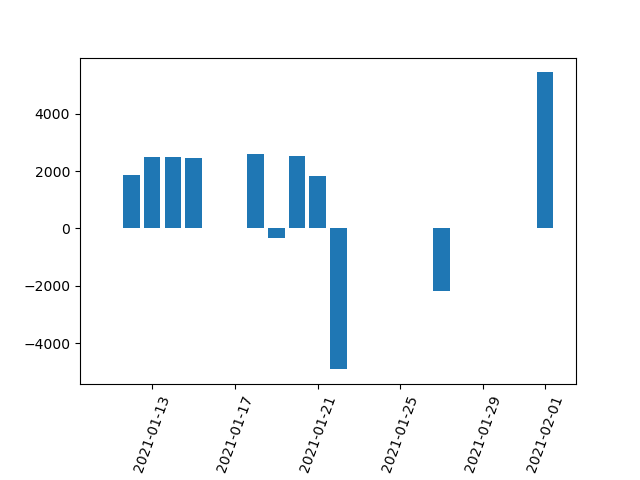

In [37]:
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=0.20)
plt.bar(dfFinal[dfFinal.columns.values[0]], dfFinal[dfFinal.columns.values[7]])
plt.show()